In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [4]:
score = lambda d: d['logret'].ewm(span = 7, min_periods = 7).mean().shift(1)

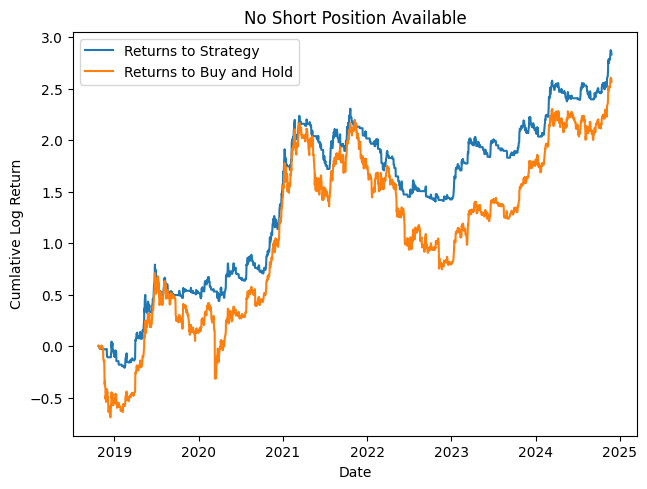

In [46]:
#no short selling

df = pd.read_csv('proj_data.csv')
df['date'] = pd.to_datetime(df['date'])

df = df[df.tick == 'BTC-USD']
df[f'score'] = score(df)
df.dropna(subset=('score'), inplace=True)

df['position'] = df.score >=0
df['position_X_logret'] = df.position*df.logret

#print(df)

plt.plot(df['date'], df['position_X_logret'].cumsum(), label = 'Returns to Strategy')
plt.plot(df['date'], df['logret'].cumsum(), label = 'Returns to Buy and Hold')


plt.legend()
plt.title('No Short Position Available')
plt.tight_layout()  
plt.xlabel('Date')
plt.ylabel('Cumlative Log Return')
plt.show()


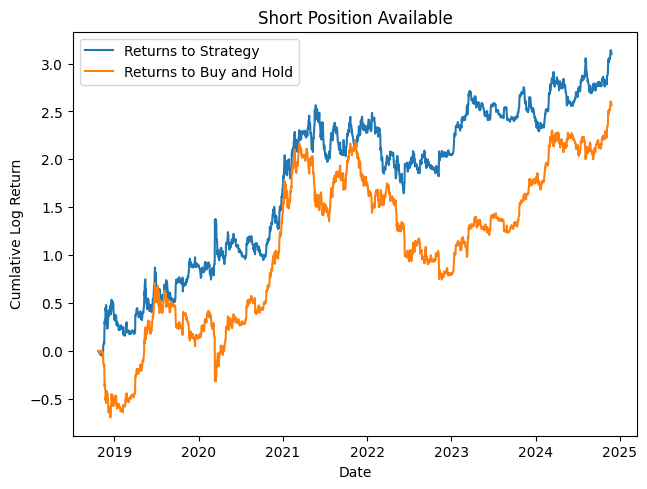

In [41]:
#short positions

df = pd.read_csv('proj_data.csv')
df['date'] = pd.to_datetime(df['date'])
df = df[df.tick == 'BTC-USD']
df[f'score'] = score(df)
df.dropna(subset=('score'), inplace=True)
n = len(df)
mask_l = df.score >=0 
mask_s = df.score < 0

df['position'] = np.ones(n)*mask_l - np.ones(n)*mask_s
df['position_X_logret'] = df.position*df.logret



plt.plot(df['date'], df['position_X_logret'].cumsum(), label = 'Returns to Strategy')
plt.plot(df['date'], df['logret'].cumsum(), label = 'Returns to Buy and Hold')


plt.legend()
plt.title('Short Position Available')
plt.tight_layout()  
plt.xlabel('Date')
plt.ylabel('Cumlative Log Return')
plt.show()


C:\Users\Joshua Hoagland\AppData\Local\Temp\ipykernel_14204\2064655024.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[f'score'] = score(df)
C:\Users\Joshua Hoagland\AppData\Local\Temp\ipykernel_14204\2064655024.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.dropna(subset=('score'), inplace=True)
C:\Users\Joshua Hoagland\AppData\Local\Temp\ipykernel_14204\2064655024.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the docu

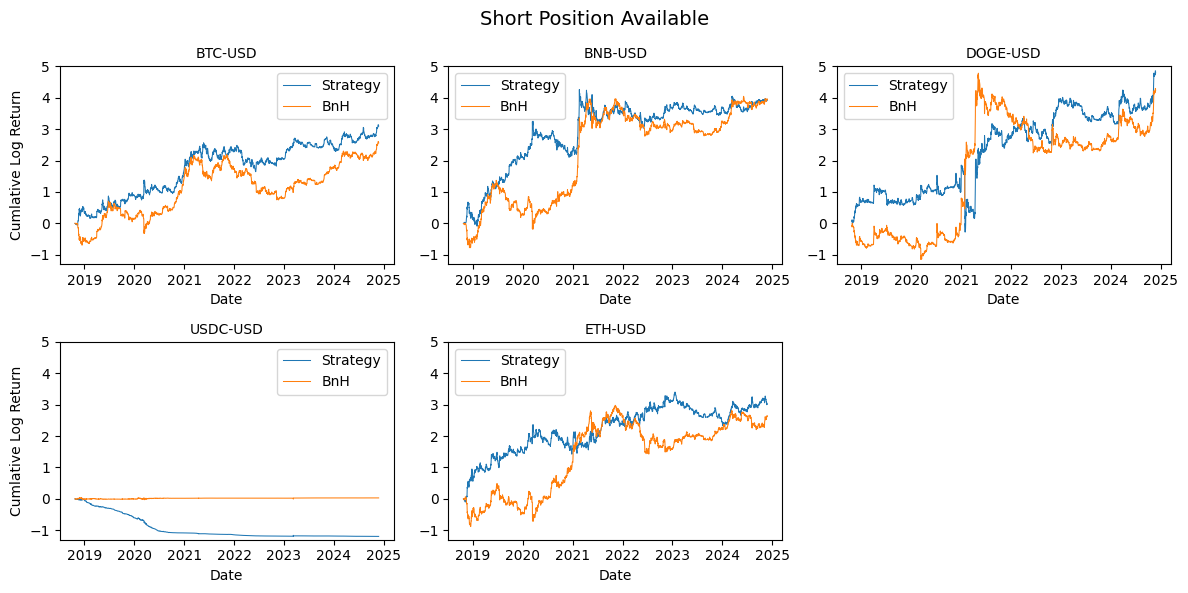

In [77]:
df1 = pd.read_csv('proj_data.csv')
df1['date'] = pd.to_datetime(df1['date'])

plt.figure(figsize=(12,6))


for i,ticker in enumerate(df1['tick'].unique()[::-1]):
    plt.subplot(2,3,i+1)
    df = df1[df1.tick == ticker]
    df[f'score'] = score(df)
    df.dropna(subset=('score'), inplace=True)
    n = len(df)
    mask_l = df.score >=0 
    mask_s = df.score < 0

    df['position'] = np.ones(n)*mask_l - np.ones(n)*mask_s
    df['position_X_logret'] = df.position*df.logret



    plt.plot(df['date'], df['position_X_logret'].cumsum(), label = 'Strategy', lw = .75)
    plt.plot(df['date'], df['logret'].cumsum(), label = 'BnH', lw = .75)
    
    plt.ylim(-1.3,5)
    plt.legend()
    plt.title(ticker,fontsize = 10) 
    plt.xlabel('Date')
    if i ==0 or i==3:
        plt.ylabel('Cumlative Log Return')

plt.suptitle('Short Position Available',fontsize = 14)
plt.tight_layout() 
plt.show()


C:\Users\Joshua Hoagland\AppData\Local\Temp\ipykernel_14204\1876027126.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[f'score'] = score(df)
C:\Users\Joshua Hoagland\AppData\Local\Temp\ipykernel_14204\1876027126.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.dropna(subset=('score'), inplace=True)
C:\Users\Joshua Hoagland\AppData\Local\Temp\ipykernel_14204\1876027126.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the docu

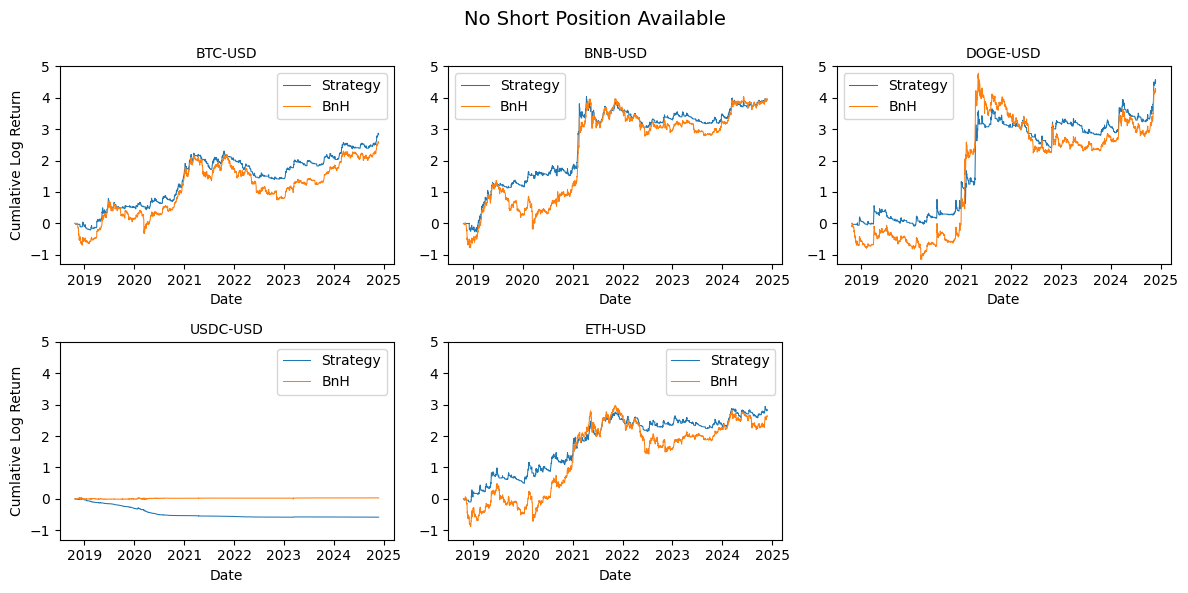

In [78]:
df1 = pd.read_csv('proj_data.csv')
df1['date'] = pd.to_datetime(df1['date'])

plt.figure(figsize=(12,6))


for i,ticker in enumerate(df1['tick'].unique()[::-1]):
    plt.subplot(2,3,i+1)
    df = df1[df1.tick == ticker]
    df[f'score'] = score(df)
    df.dropna(subset=('score'), inplace=True)
    df['position'] = df.score >=0
    df['position_X_logret'] = df.position*df.logret



    plt.plot(df['date'], df['position_X_logret'].cumsum(), label = 'Strategy', lw = .75)
    plt.plot(df['date'], df['logret'].cumsum(), label = 'BnH', lw = .75)

    plt.ylim(-1.3,5)
    plt.legend()
    plt.title(ticker,fontsize = 10) 
    plt.xlabel('Date')
    if i ==0 or i==3:
        plt.ylabel('Cumlative Log Return')

plt.suptitle('No Short Position Available',fontsize = 14)
plt.tight_layout() 
plt.show()




